# Neural Network Assignment 2 - spring 2024

### Mohammad Hossein Najafi - 97103938
---
In this assignment, we perform classification on a CSV file using a perceptron. Next, we train the perceptron to detect characters.

### CSV File

#### Prerequisites
First, we import the numpy library because we use it to work with arrays. Additionally, we import the pandas and os libraries for reading the CSV file. Lastly, we import matplotlib for plotting.

In [88]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [90]:
df = pd.read_csv('perceptron.csv')  # Load the data from the file
df                                  # Display the DataFrame

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0
...,...,...,...
395,0.574634,0.782211,-1.0
396,-1.413307,-0.673049,1.0
397,-0.465114,-1.290830,1.0
398,1.522055,0.948007,-1.0


#### Show dataset

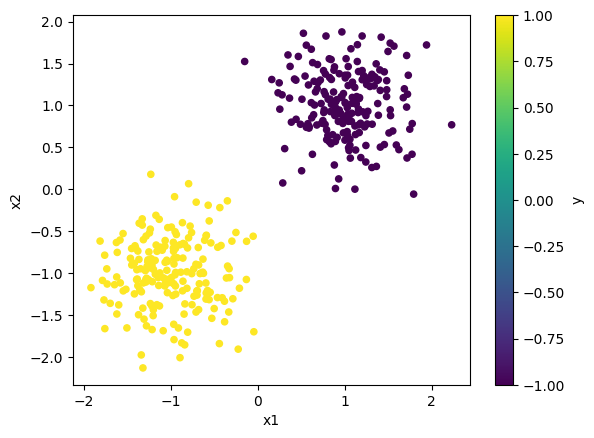

In [91]:
df.plot.scatter(x='x1', y='x2', c='y', colormap='viridis') # Plot the data
plt.show()  # Display the plot

#### Model Definition

In [92]:
class perceptron: 
    def __init__(self):                     # Initialize the perceptron
        self.weights = [0.0] * 2            
        self.bias = 0.0                     
        self.learning_rate =0.01            

    def predict(self,X,treshold):           # Define the predict function
        y_pred = np.dot(X,self.weights) + self.bias 
        if y_pred > treshold:
            return 1.0
        elif y_pred < -treshold:
            return -1.0
        else :
            return 0.0

    def train(self, X, y, epoch, treshold):  # Define the train function
        for i in range(epoch):
            for j in range(len(X)):
                y_pred = self.predict(X[j],treshold)
                if y_pred != y[j]:
                    self.update_weights(y[j],y_pred,X[j])
    
    def update_weights(self,y,y_pred,X):     # Define the update_weights function
        self.weights += self.learning_rate * y * X
        self.bias += self.learning_rate * y

#### Training
First, we shuffle the dataset and then split it into 80% for training and 20% for testing. Then, train the model.

In [129]:
dataset = df[['x1','x2','y']].values
np.random.shuffle(dataset)      # shuffle the dataset
dataset = np.array(dataset)

number = 320                    # number of training data
train_dataset = dataset[:number]
test_dataset = dataset[number:]

X = np.array(train_dataset[:,:2])       # Feature data
y = np.array(train_dataset[:,2])        # Label data

model = perceptron()                    # Create a perceptron model
epoch = 100
treshold = 0.1
model.train(X,y,epoch,treshold)         # Train the model
print(model.weights)
print(model.bias)

[-0.15277642 -0.15837201]
0.009999999999999997


In [130]:
accuracy = 0
for i in range(len(test_dataset)):    # Test the model
    if model.predict(test_dataset[i][:2],treshold) == test_dataset[i][2]:
        accuracy += 1
accuracy = accuracy / len(test_dataset)*100         # Calculate the accuracy

print("test accuracy: %.2f" % accuracy + "%")

test accuracy: 97.50%


With this level of test accuracy, the model generally performs well, and it only fails to correctly detect two points.

### Show the lines

Now, after training, the perceptron classifies the data. It creates three lines: the blue line represents zero and is in the middle. The green line represents '-threshold', and any point above it yields an output of -1. The red line represents '+threshold', and any point below it yields an output of +1. Any point between the red and green lines yields an output of 0.

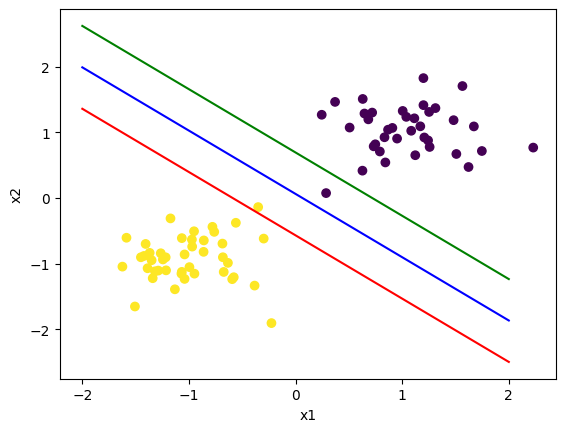

In [132]:
a = np.linspace(-2,2,100)
plt.scatter(test_dataset[:,0], test_dataset[:,1], c=test_dataset[:,2], cmap='viridis') # Plot the test data
plt.plot(a, (-model.bias - model.weights[0] * a) / model.weights[1], color = 'blue') # Plot the decision boundary
plt.plot(a, ((-model.bias - model.weights[0] * a) + treshold) / model.weights[1], color = 'red') # Plot the margin
plt.plot(a, ((-model.bias - model.weights[0] * a) - treshold) / model.weights[1], color = 'green') # Plot the margin
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

As expected, only two points in the middle yield incorrect outputs.

#### small treshold
Now, we decrease the threshold to 0.001, then train and test again to see what will happen.

In [144]:
model_smaller_treshold = perceptron()  # Create another perceptron model
epoch = 100
treshold = 0.001
model_smaller_treshold.train(X,y,epoch,treshold) # Train the model

print(model_smaller_treshold.weights)
print(model_smaller_treshold.bias)

[-0.01414971 -0.02055794]
0.0


In [145]:
accuracy = 0
for i in range(len(test_dataset)): # Test the model
    if model_smaller_treshold.predict(test_dataset[i][:2],treshold) == test_dataset[i][2]:
        accuracy += 1
accuracy = accuracy / len(test_dataset)*100

print("test accuracy: %.2f" % accuracy + "%")

test accuracy: 100.00%


By decreasing the threshold, the accuracy increased. I believe this is because the boundary of the margin decreased, causing the two previously incorrect points to exit the zero area and yield the correct output now.

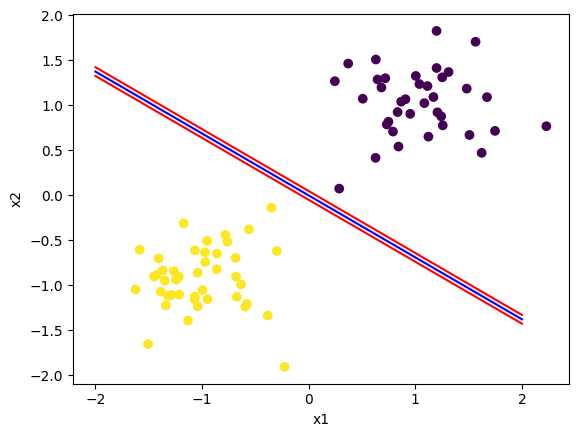

In [146]:
a = np.linspace(-2,2,100)
plt.scatter(test_dataset[:,0], test_dataset[:,1], c=test_dataset[:,2], cmap='viridis') # Plot the test data
plt.plot(a, (-model_smaller_treshold.bias - model_smaller_treshold.weights[0] * a) / model_smaller_treshold.weights[1], color = 'blue') # Plot the decision boundary
plt.plot(a, ((-model_smaller_treshold.bias - model_smaller_treshold.weights[0] * a) + treshold) / model_smaller_treshold.weights[1], color = 'red') # Plot the margin
plt.plot(a, ((-model_smaller_treshold.bias - model_smaller_treshold.weights[0] * a) - treshold) / model_smaller_treshold.weights[1], color = 'red') # Plot the margin
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

The plot also indicates that the margin has decreased.

#### big treshold
Now, we increase the threshold to 100, then train and test again to see what will happen.

In [149]:
model_bigger_treshold = perceptron() # Create another perceptron model
epoch = 100
treshold = 100
model_bigger_treshold.train(X,y,epoch,treshold) # Train the model

print(model_bigger_treshold.weights)
print(model_bigger_treshold.bias)

[-77.57801694 -77.30432832]
1.7700000000000014


In [151]:
accuracy = 0
for i in range(len(test_dataset)):  # Test the model
    if model_bigger_treshold.predict(test_dataset[i][:2],treshold) == test_dataset[i][2]:
        accuracy += 1
accuracy = accuracy / len(test_dataset)*100

print("test accuracy: %.2f" % accuracy + "%")

test accuracy: 92.50%


As expected, the accuracy decreased because the margin increased (6 wrong points).

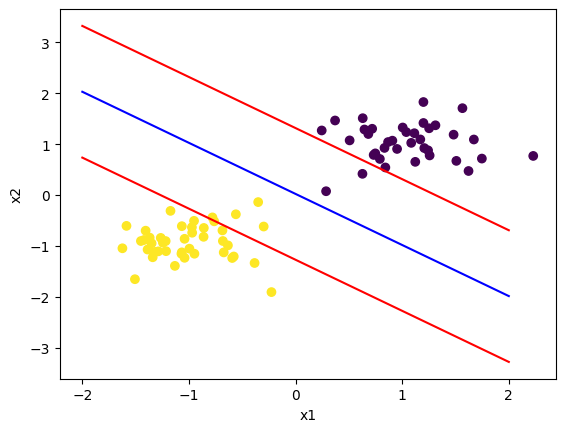

In [152]:
a = np.linspace(-2,2,100)
plt.scatter(test_dataset[:,0], test_dataset[:,1], c=test_dataset[:,2], cmap='viridis') # Plot the test data
plt.plot(a, (-model_bigger_treshold.bias - model_bigger_treshold.weights[0] * a) / model_bigger_treshold.weights[1], color = 'blue') # Plot the decision boundary
plt.plot(a, ((-model_bigger_treshold.bias - model_bigger_treshold.weights[0] * a) + treshold) / model_bigger_treshold.weights[1], color = 'red') # Plot the margin
plt.plot(a, ((-model_bigger_treshold.bias - model_bigger_treshold.weights[0] * a) - treshold) / model_bigger_treshold.weights[1], color = 'red') # Plot the margin
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

we can observe six points located in the incorrect area.

### Character Detection

#### Fonts
First, we define fonts with a 63 cell array (7*9 resolution) and display them.

In [156]:
# definition of a function to display a font
def show_font(font):
    for pixel in np.arange(0, 63):
        if pixel % 9 == 0:
            print()
        if font[pixel] == 1:
            print("\u2588", end="")
        else:
            print(" ", end="")

In [157]:
# Dataset of the letter B
font_b_1=[
    1, 1, 1, 1, 1, 1, 1, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 0
]
show_font(font_b_1)
print()

font_b_2=[
    1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 0
]
show_font(font_b_2)

print()
font_b_3=[
    0, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1,
    0, 1, 0, 0, 0, 0, 0, 0, 1,
    0, 1, 0, 0, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 1, 1, 1, 1, 0
]
show_font(font_b_3)


████████ 
█       █
█████████
█       █
█       █
█       █
████████ 

███████  
█      █ 
█      █ 
████████ 
█      █ 
█      █ 
████████ 

 ███████ 
 █      █
 ███████ 
 █      █
 █      █
 █      █
 ███████ 

In [158]:
# Dataset of the letter C
font_c_1 = [
    0, 1, 1, 1, 1, 1, 1, 1, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1,
    0, 1, 1, 1, 1, 1, 1, 1, 0
]
show_font(font_c_1)
print()
font_c_2 = [
    1, 1, 1, 1, 1, 1, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 1, 1, 1, 1, 1, 0, 0, 0
]
show_font(font_c_2)
print()
font_c_3 = [
    1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1
]
show_font(font_c_3)


 ███████ 
█████████
██       
██       
██       
█████████
 ███████ 

██████   
███████  
██       
██       
██       
███████  
██████   

█████████
█████████
██       
██       
██       
█████████
█████████

In [159]:
# Dataset of the letter D
font_d_1 = [
    1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1
]
show_font(font_d_1)
print()

font_d_2 = [
    1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 1, 0, 0, 0, 0, 1, 1, 0,
    1, 1, 0, 0, 0, 0, 1, 1, 0,
    1, 1, 0, 0, 0, 0, 1, 1, 0,
    1, 1, 0, 0, 0, 0, 1, 1, 0,
    1, 1, 0, 0, 0, 0, 1, 1, 0,
    1, 1, 1, 1, 1, 1, 1, 0, 0
]
show_font(font_d_2)
print()

font_d_3 = [
    0, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 1, 1, 0, 0, 0, 0, 1, 1,
    0, 1, 1, 0, 0, 0, 0, 1, 1,
    0, 1, 1, 0, 0, 0, 0, 1, 1,
    0, 1, 1, 0, 0, 0, 0, 1, 1,
    0, 1, 1, 0, 0, 0, 0, 1, 1,
    0, 1, 1, 1, 1, 1, 1, 1, 0
]
show_font(font_d_3)



█████████
██      █
██      █
██      █
██      █
██      █
█████████

███████  
██    ██ 
██    ██ 
██    ██ 
██    ██ 
██    ██ 
███████  

 ███████ 
 ██    ██
 ██    ██
 ██    ██
 ██    ██
 ██    ██
 ███████ 

In [160]:
# Dataset of the letter L
font_l_1 = [
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 1, 1, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0
]
show_font(font_l_1)
print(sum(font_l_1))

font_l_2 = [
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 1, 0, 0, 0
]
show_font(font_l_2)

font_l_3 = [
    0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 1, 1, 1, 1, 1, 1, 1
]
show_font(font_l_3)


 █       
 █       
 █       
 █       
 ██████  
         
         10

 █       
 █       
 █       
 █       
 █       
 █       
 █████   
  █      
  █      
  █      
  █      
  █      
  █      
  ███████

In [161]:
# Dataset of the letter N
font_n_1 = [
    1, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 0, 1, 0, 0, 0, 0, 0, 1,
    1, 0, 0, 1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 1, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1, 0, 0, 1,
    1, 0, 0, 0, 0, 0, 1, 0, 1,
    1, 0, 0, 0, 0, 0, 0, 1, 1
]
show_font(font_n_1)

font_n_2 = [
    0, 0, 1, 0, 0, 0, 0, 0, 1,
    0, 0, 1, 1, 0, 0, 0, 0, 1,
    0, 0, 1, 0, 1, 0, 0, 0, 1,
    0, 0, 1, 0, 0, 1, 0, 0, 1,
    0, 0, 1, 0, 0, 0, 1, 0, 1,
    0, 0, 1, 0, 0, 0, 0, 1, 1,
    0, 0, 1, 0, 0, 0, 0, 0, 1
]
show_font(font_n_2)

font_n_3 = [
    1, 0, 0, 0, 0, 0, 1, 0, 0,
    1, 1, 0, 0, 0, 0, 1, 0, 0,
    1, 0, 1, 0, 0, 0, 1, 0, 0,
    1, 0, 0, 1, 0, 0, 1, 0, 0,
    1, 0, 0, 0, 1, 0, 1, 0, 0,
    1, 0, 0, 0, 0, 1, 1, 0, 0,
    1, 0, 0, 0, 0, 0, 1, 0, 0
]
show_font(font_n_3)


██      █
█ █     █
█  █    █
█   █   █
█    █  █
█     █ █
█      ██
  █     █
  ██    █
  █ █   █
  █  █  █
  █   █ █
  █    ██
  █     █
█     █  
██    █  
█ █   █  
█  █  █  
█   █ █  
█    ██  
█     █  

#### Bipolar encoding
For bipolar encoding, it suffices to use a function that replaces zero arrays with -1 for patterns.

In [162]:
# Create the patterns array
def replace_zero(array):
  array = np.where(array==0,-1,array)
  return array

patterns = replace_zero(np.array([font_b_1, font_b_2, font_b_3, font_c_1, font_c_2, font_c_3, font_d_1, font_d_2, font_d_3, font_l_1, font_l_2, font_l_3, font_n_1, font_n_2, font_n_3]))

#### Define target
Now, we define binary target arrays where each array represents a neuron target class.

In [167]:
# Each array has 15 elements with 1s at specific indices indicating the presence of the target.
# The indices are as follows: 0-2: B, 3-5: C, 6-8: D, 9-11: L, 12-14: N
target_b = [ 1, 1, 1,  -1,-1,-1,  -1,-1,-1, -1,-1,-1, -1,-1,-1]
target_c = [-1,-1,-1,   1, 1, 1,  -1,-1,-1, -1,-1,-1, -1,-1,-1]
target_d = [-1,-1,-1,  -1,-1,-1,   1, 1, 1, -1,-1,-1, -1,-1,-1]
target_l = [-1,-1,-1,  -1,-1,-1,  -1,-1,-1,  1, 1, 1, -1,-1,-1]
target_n = [-1,-1,-1,  -1,-1,-1,  -1,-1,-1, -1,-1,-1,  1, 1, 1]

# Create a numpy array 'output_target' containing all the target arrays as rows.
output_target= np.array([target_b,target_c,target_d,target_l,target_n])

#### Define model

In [168]:
class character_perceptron:     # Define the character_perceptron class
    def __init__(self):
        self.weights = [0.0] * 63
        self.bias = 0.0
        self.treshold =0.3

    def predict(self,X):        # Define the predict function
        y_pred = np.dot(X,self.weights) + self.bias
        if y_pred > self.treshold:
            return 1.0
        elif y_pred < -self.treshold:
            return -1.0
        else :
            return 0.0

    def train(self, X, y, epoch, learning_rate):  # Define the train function
        for i in range(epoch):
            for j in range(len(X)):
                y_pred = self.predict(X[j])
                if y_pred != y[j]:
                    self.update_weights(y[j],y_pred,X[j],learning_rate)
    
    def update_weights(self,y,y_pred,X,learning_rate):    # Define the update_weights function
        self.weights += learning_rate * y * X
        self.bias += learning_rate * y

In [169]:
neuron_b = character_perceptron()
neuron_c = character_perceptron()
neuron_d = character_perceptron()
neuron_l = character_perceptron()
neuron_n = character_perceptron()

#### Training
We train the neurons by all of the fonts.

In [170]:
X = patterns
y = output_target
learning_rate = 0.01
epoch = 25 
for i in range(5):  # Train the perceptrons
    neuron_b.train(X,y[0],epoch,learning_rate)
    neuron_c.train(X,y[1],epoch,learning_rate)
    neuron_d.train(X,y[2],epoch,learning_rate)
    neuron_l.train(X,y[3],epoch,learning_rate)
    neuron_n.train(X,y[4],epoch,learning_rate)


#### Testing
Also, we test the neurons by all of the fonts.

In [172]:
accuracy_b = 0
for i in range(len(X)):     # Test the B perceptron
    if neuron_b.predict(X[i]) == y[0][i]:
        accuracy_b += 1

accuracy_c = 0
for i in range(len(X)):     # Test the c perceptron
    if neuron_c.predict(X[i]) == y[1][i]:
        accuracy_c += 1

accuracy_d = 0
for i in range(len(X)):     # Test the D perceptron
    if neuron_d.predict(X[i]) == y[2][i]:
        accuracy_d += 1

accuracy_l = 0
for i in range(len(X)):     # Test the L perceptron
    if neuron_l.predict(X[i]) == y[3][i]:
        accuracy_l += 1

accuracy_n = 0
for i in range(len(X)):     # Test the N perceptron
    if neuron_n.predict(X[i]) == y[4][i]:
        accuracy_n += 1

print("Accuracy of B: %.2f" % (accuracy_b/len(X)*100) + "%")
print("Accuracy of C: %.2f" % (accuracy_c/len(X)*100) + "%")
print("Accuracy of D: %.2f" % (accuracy_d/len(X)*100) + "%")
print("Accuracy of L: %.2f" % (accuracy_l/len(X)*100) + "%")
print("Accuracy of N: %.2f" % (accuracy_n/len(X)*100) + "%")

print()
print("Total accuracy: %.2f" % ((accuracy_b+accuracy_c+accuracy_d+accuracy_l+accuracy_n)/(5*len(X))*100) + "%")

Accuracy of B: 100.00%
Accuracy of C: 100.00%
Accuracy of D: 100.00%
Accuracy of L: 100.00%
Accuracy of N: 100.00%

Total accuracy: 100.00%


#### MSE
Now, we calculate the MSE using the formula provided in the question.

In [173]:
# predict the fonts in each neuron by (X . weights + bias)
predicted_values_b = []     
predicted_values_c = []
predicted_values_d = []
predicted_values_l = []
predicted_values_n = []

for i in range(len(X)):
    predicted_values_b.append(np.dot(X[i],neuron_b.weights) + neuron_b.bias)
    predicted_values_c.append(np.dot(X[i],neuron_c.weights) + neuron_c.bias)
    predicted_values_d.append(np.dot(X[i],neuron_d.weights) + neuron_d.bias)
    predicted_values_l.append(np.dot(X[i],neuron_l.weights) + neuron_l.bias)
    predicted_values_n.append(np.dot(X[i],neuron_n.weights) + neuron_n.bias)


In [174]:
mse_b =[]
mse_c =[]
mse_d =[]
mse_l =[]
mse_n =[]

for i in range(len(X)): # Calculate the mean squared error
    mse_b.append((y[0][i] - predicted_values_b[i])**2)
    mse_c.append((y[1][i] - predicted_values_c[i])**2)
    mse_d.append((y[2][i] - predicted_values_d[i])**2)
    mse_l.append((y[3][i] - predicted_values_l[i])**2)
    mse_n.append((y[4][i] - predicted_values_n[i])**2)

print("Mean Squared Error of B: %.2f" % sum(mse_b))
print("Mean Squared Error of C: %.2f" % sum(mse_c))
print("Mean Squared Error of D: %.2f" % sum(mse_d))
print("Mean Squared Error of L: %.2f" % sum(mse_l))
print("Mean Squared Error of N: %.2f" % sum(mse_n))
      

Mean Squared Error of B: 1.73
Mean Squared Error of C: 1.64
Mean Squared Error of D: 2.76
Mean Squared Error of L: 2.69
Mean Squared Error of N: 1.44


#### big learning rate
Now, we increase learning rate to 0.99.

In [179]:
neuron_b = character_perceptron()
neuron_c = character_perceptron()
neuron_d = character_perceptron()
neuron_l = character_perceptron()
neuron_n = character_perceptron()

X = patterns
y = output_target
learning_rate = 0.99
epoch = 25
for i in range(5):
    neuron_b.train(X,y[0],epoch,learning_rate)
    neuron_c.train(X,y[1],epoch,learning_rate)
    neuron_d.train(X,y[2],epoch,learning_rate)
    neuron_l.train(X,y[3],epoch,learning_rate)
    neuron_n.train(X,y[4],epoch,learning_rate)

accuracy_b = 0
for i in range(len(X)):
    if neuron_b.predict(X[i]) == y[0][i]:
        accuracy_b += 1

accuracy_c = 0
for i in range(len(X)):
    if neuron_c.predict(X[i]) == y[1][i]:
        accuracy_c += 1

accuracy_d = 0
for i in range(len(X)):
    if neuron_d.predict(X[i]) == y[2][i]:
        accuracy_d += 1

accuracy_l = 0
for i in range(len(X)):
    if neuron_l.predict(X[i]) == y[3][i]:
        accuracy_l += 1

accuracy_n = 0
for i in range(len(X)):
    if neuron_n.predict(X[i]) == y[4][i]:
        accuracy_n += 1

print("Accuracy of B: %.2f" % (accuracy_b/len(X)*100) + "%")
print("Accuracy of C: %.2f" % (accuracy_c/len(X)*100) + "%")
print("Accuracy of D: %.2f" % (accuracy_d/len(X)*100) + "%")
print("Accuracy of L: %.2f" % (accuracy_l/len(X)*100) + "%")
print("Accuracy of N: %.2f" % (accuracy_n/len(X)*100) + "%")

print()
print("Total accuracy: %.2f" % ((accuracy_b+accuracy_c+accuracy_d+accuracy_l+accuracy_n)/(5*len(X))*100) + "%")

Accuracy of B: 100.00%
Accuracy of C: 100.00%
Accuracy of D: 100.00%
Accuracy of L: 100.00%
Accuracy of N: 100.00%

Total accuracy: 100.00%


In [180]:
predicted_values_b = []
predicted_values_c = []
predicted_values_d = []
predicted_values_l = []
predicted_values_n = []

for i in range(len(X)):
    predicted_values_b.append(np.dot(X[i],neuron_b.weights) + neuron_b.bias)
    predicted_values_c.append(np.dot(X[i],neuron_c.weights) + neuron_c.bias)
    predicted_values_d.append(np.dot(X[i],neuron_d.weights) + neuron_d.bias)
    predicted_values_l.append(np.dot(X[i],neuron_l.weights) + neuron_l.bias)
    predicted_values_n.append(np.dot(X[i],neuron_n.weights) + neuron_n.bias)

mse_b =[]
mse_c =[]
mse_d =[]
mse_l =[]
mse_n =[]

for i in range(len(X)):
    mse_b.append((y[0][i] - predicted_values_b[i])**2)
    mse_c.append((y[1][i] - predicted_values_c[i])**2)
    mse_d.append((y[2][i] - predicted_values_d[i])**2)
    mse_l.append((y[3][i] - predicted_values_l[i])**2)
    mse_n.append((y[4][i] - predicted_values_n[i])**2)

print("Mean Squared Error of B: %.2f" % sum(mse_b))
print("Mean Squared Error of C: %.2f" % sum(mse_c))
print("Mean Squared Error of D: %.2f" % sum(mse_d))
print("Mean Squared Error of L: %.2f" % sum(mse_l))
print("Mean Squared Error of N: %.2f" % sum(mse_n))
      

Mean Squared Error of B: 30777.90
Mean Squared Error of C: 23996.80
Mean Squared Error of D: 33451.02
Mean Squared Error of L: 44340.51
Mean Squared Error of N: 33537.43


We observe a significant increase in the MSE.

#### small learning rate
Now, we decrease learning rate to 0.001.

In [181]:
neuron_b = character_perceptron()
neuron_c = character_perceptron()
neuron_d = character_perceptron()
neuron_l = character_perceptron()
neuron_n = character_perceptron()

X = patterns
y = output_target
learning_rate = 0.001
epoch = 25
for i in range(5):
    neuron_b.train(X,y[0],epoch,learning_rate)
    neuron_c.train(X,y[1],epoch,learning_rate)
    neuron_d.train(X,y[2],epoch,learning_rate)
    neuron_l.train(X,y[3],epoch,learning_rate)
    neuron_n.train(X,y[4],epoch,learning_rate)

accuracy_b = 0
for i in range(len(X)):
    if neuron_b.predict(X[i]) == y[0][i]:
        accuracy_b += 1

accuracy_c = 0
for i in range(len(X)):
    if neuron_c.predict(X[i]) == y[1][i]:
        accuracy_c += 1

accuracy_d = 0
for i in range(len(X)):
    if neuron_d.predict(X[i]) == y[2][i]:
        accuracy_d += 1

accuracy_l = 0
for i in range(len(X)):
    if neuron_l.predict(X[i]) == y[3][i]:
        accuracy_l += 1

accuracy_n = 0
for i in range(len(X)):
    if neuron_n.predict(X[i]) == y[4][i]:
        accuracy_n += 1

print("Accuracy of B: %.2f" % (accuracy_b/len(X)*100) + "%")
print("Accuracy of C: %.2f" % (accuracy_c/len(X)*100) + "%")
print("Accuracy of D: %.2f" % (accuracy_d/len(X)*100) + "%")
print("Accuracy of L: %.2f" % (accuracy_l/len(X)*100) + "%")
print("Accuracy of N: %.2f" % (accuracy_n/len(X)*100) + "%")

print()
print("Total accuracy: %.2f" % ((accuracy_b+accuracy_c+accuracy_d+accuracy_l+accuracy_n)/(5*len(X))*100) + "%")

Accuracy of B: 100.00%
Accuracy of C: 100.00%
Accuracy of D: 100.00%
Accuracy of L: 100.00%
Accuracy of N: 100.00%

Total accuracy: 100.00%


In [182]:
predicted_values_b = []
predicted_values_c = []
predicted_values_d = []
predicted_values_l = []
predicted_values_n = []

for i in range(len(X)):
    predicted_values_b.append(np.dot(X[i],neuron_b.weights) + neuron_b.bias)
    predicted_values_c.append(np.dot(X[i],neuron_c.weights) + neuron_c.bias)
    predicted_values_d.append(np.dot(X[i],neuron_d.weights) + neuron_d.bias)
    predicted_values_l.append(np.dot(X[i],neuron_l.weights) + neuron_l.bias)
    predicted_values_n.append(np.dot(X[i],neuron_n.weights) + neuron_n.bias)

mse_b =[]
mse_c =[]
mse_d =[]
mse_l =[]
mse_n =[]

for i in range(len(X)):
    mse_b.append((y[0][i] - predicted_values_b[i])**2)
    mse_c.append((y[1][i] - predicted_values_c[i])**2)
    mse_d.append((y[2][i] - predicted_values_d[i])**2)
    mse_l.append((y[3][i] - predicted_values_l[i])**2)
    mse_n.append((y[4][i] - predicted_values_n[i])**2)

print("Mean Squared Error of B: %.2f" % sum(mse_b))
print("Mean Squared Error of C: %.2f" % sum(mse_c))
print("Mean Squared Error of D: %.2f" % sum(mse_d))
print("Mean Squared Error of L: %.2f" % sum(mse_l))
print("Mean Squared Error of N: %.2f" % sum(mse_n))

Mean Squared Error of B: 5.21
Mean Squared Error of C: 5.66
Mean Squared Error of D: 5.56
Mean Squared Error of L: 4.84
Mean Squared Error of N: 5.05


We also observe that the MSE increases from the initial learning rate.

#### Chage Epoch
In this part, we change epoch to observe this effect on the MSE.

In [183]:
total_error=np.zeros(5)  # Create an array to store the total error for each epoch

X = patterns
y = output_target
learning_rate = 0.01
epoch = [5,10,20,50,100]  # Define the epochs

for j in range(5):
    error=0

    neuron_b = character_perceptron()   # Create a perceptron for each character
    neuron_b.train(X,y[0],epoch[j],learning_rate) # Train the perceptron
    for i in range(len(X)): # Calculate the error
        error += (y[0][i] - (np.dot(X[i],neuron_b.weights) + neuron_b.bias))**2

    neuron_c = character_perceptron()
    neuron_c.train(X,y[1],epoch[j],learning_rate)
    for i in range(len(X)):
        error += (y[1][i] - (np.dot(X[i],neuron_c.weights) + neuron_c.bias))**2 

    neuron_d = character_perceptron()
    neuron_d.train(X,y[2],epoch[j],learning_rate)
    for i in range(len(X)):
        error += (y[2][i] - (np.dot(X[i],neuron_d.weights) + neuron_d.bias))**2

    neuron_l = character_perceptron()
    neuron_l.train(X,y[3],epoch[j],learning_rate)
    for i in range(len(X)):
        error += (y[3][i] - (np.dot(X[i],neuron_l.weights) + neuron_l.bias))**2

    neuron_n = character_perceptron()
    neuron_n.train(X,y[4],epoch[j],learning_rate)
    for i in range(len(X)):
        error += (y[4][i] - (np.dot(X[i],neuron_n.weights) + neuron_n.bias))**2

    total_error[j] = error # Store the total error

total_error

array([11.3692, 10.258 , 10.258 , 10.258 , 10.258 ])

As we can see, the MSE is higher for the initial epoch, then it decreases, and subsequently, it doesn't change significantly

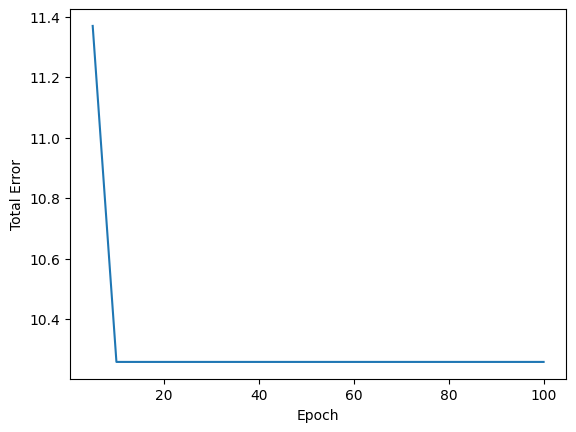

In [184]:
plt.plot(epoch,total_error) # Plot the total error
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.show()